In [1]:
url = "https://www.bbc.com/news/live/world-europe-66006142"

In [2]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html lang="en-gb" class="b-pw-1280 b-reith-sans-font no-touch" id="responsive-news">
<head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=1">
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
    <meta name="google-site-verification" content="Tk6bx1127nACXoqt94L4-D-Of1fdr5gxrZ7u2Vtj9YI">
    <link href="//static.bbc.co.uk" rel="preconnect" crossorigin>
    <link href="//m.files.bbci.co.uk" rel="preconnect" crossorigin>
    <link href="//nav.files.bbci.co.uk" rel="preconnect" crossorigin>
    <link href="//ichef.bbci.co.uk" rel="preconnect" crossorigin>
    <link rel="dns-prefetch" href="//mybbc.files.bbci.co.uk">
    <link rel="dns-prefetch" href="//ssl.bbc.co.uk/">
    <link rel="dns-prefetch" href="//sa.bbc.co.uk/">
    <link rel="dns-prefetch" href="//ichef.bbci.co.uk">

    <script type="text/javascript">var domain = "co.uk";var edition = "";var prettyEdition = edition;if (window.Ne

In [3]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""

    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True

    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False

    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+ data.replace('[ edit ]','')

In [4]:
parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Russia latest: We did not march to topple Putin, says Wagner chief Prigozhin - BBC News Homepage Accessibility links Skip to content Accessibility Help BBC Account Notifications Home News Sport Weather iPlayer Sounds Bitesize CBeebies CBBC Food Home News Sport Reel Worklife Travel Future Culture TV Weather Sounds More menu Search BBC Search BBC Home News Sport Weather iPlayer Sounds Bitesize CBeebies CBBC Food Home News Sport Reel Worklife Travel Future Culture TV Weather Sounds Close menu BBC News News Navigation Sections Home War in Ukraine Climate Video World World selected US & Canada UK Business Tech Science Entertainment & Arts Health In Pictures Reality Check World News TV Newsbeat More  More sections World  selected Africa Asia Australia Europe Europe selected Latin America Middle East More  More sections Home War in Ukraine Climate Video World World selected World Home Africa Asia Australia Europe Europe selected Latin America Middle East US & Canada UK UK Home England N. Ire

In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 51.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=f1a3e9ceb06b0bec0a6c65b9c65b07503ad10561888ea35880846baaca194054
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [6]:
import nlp_rake

extractor = nlp_rake.Rake(max_words = 2, min_freq = 3, min_chars = 5)

res = extractor.apply(text)

res

[('arts health', 4.0),
 ("uk 'prepared", 4.0),
 ("russia's papers", 4.0),
 ('tv licence', 4.0),
 ('post copy', 4.0),
 ('link read', 4.0),
 ('bbc watch', 3.8),
 ('special message', 3.7),
 ('wagner rebellion', 3.4078947368421053),
 ('yevgeny prigozhin', 3.354838709677419),
 ('ukraine war', 3.3),
 ('wagner group', 3.2578947368421054),
 ('prigozhin claims', 3.021505376344086),
 ('rebellion', 1.75),
 ('message', 1.7),
 ('wagner', 1.6578947368421053),
 ('group', 1.6),
 ('troops', 1.5714285714285714),
 ('saturday', 1.5),
 ('video', 1.5),
 ('russia', 1.4545454545454546),
 ('putin', 1.434782608695652),
 ('mutiny', 1.4),
 ('topple', 1.4),
 ('soldiers', 1.4),
 ('earlier', 1.4),
 ('support', 1.4),
 ('president', 1.375),
 ('prigozhin', 1.3548387096774193),
 ('reuters', 1.3333333333333333),
 ('ukraine', 1.3),
 ('called', 1.25),
 ('added', 1.25),
 ('weekend', 1.2),
 ('posted', 1.1904761904761905),
 ('involved', 1.1428571428571428),
 ('kremlin', 1.1428571428571428),
 ('march', 1.0),
 ('impacts', 1.0),

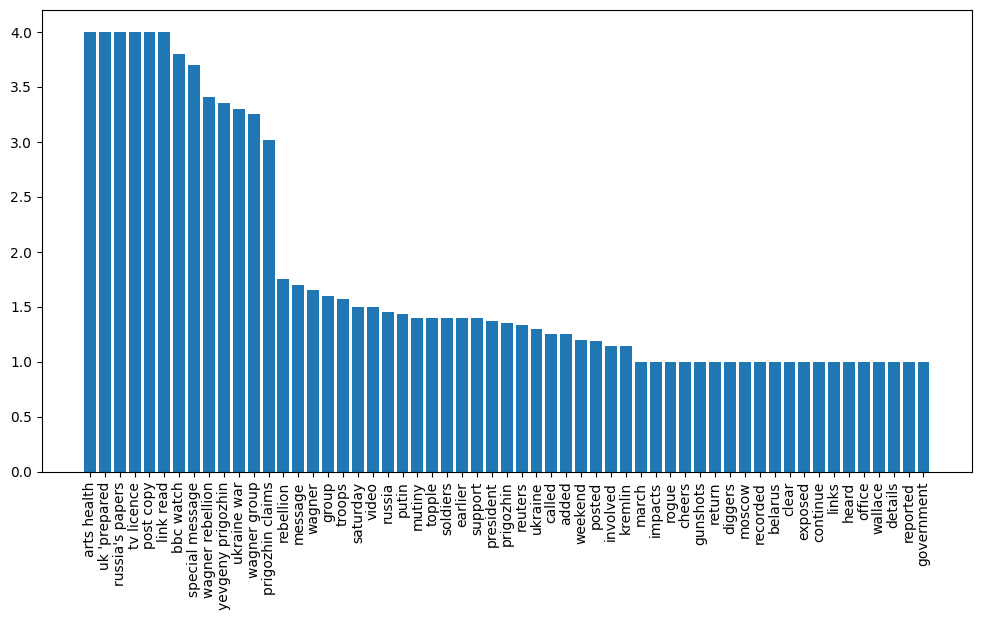

In [8]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.figure(figsize = (12, 6))
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [7]:
!{sys.executable} -m pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


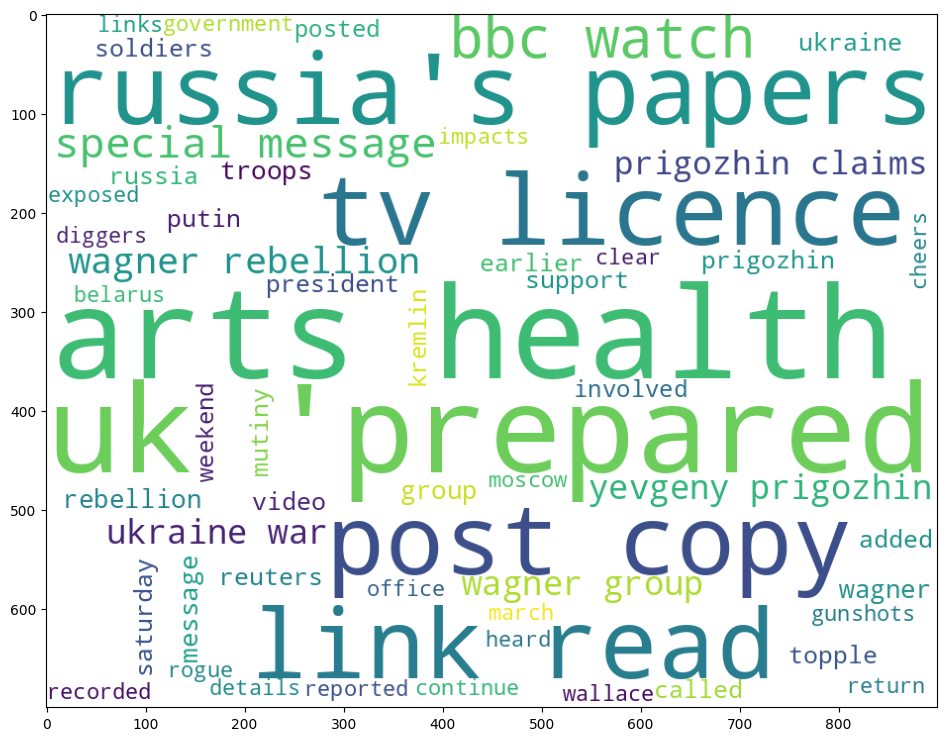

In [9]:
from wordcloud import WordCloud

wc = WordCloud(background_color = "white", width = 900, height = 700)
plt.figure(figsize = (16, 9))
plt.imshow(wc.generate_from_frequencies({k: v for k, v in res}))

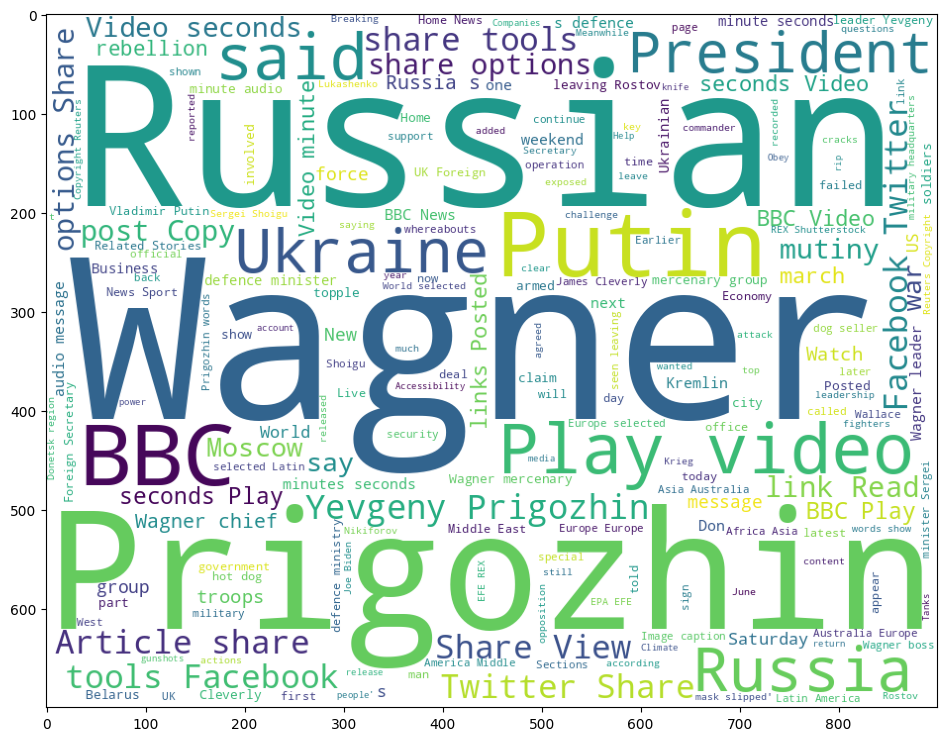

In [10]:
plt.figure(figsize = (16, 9))
plt.imshow(wc.generate(text))